# Globi database exploration:

### Author: Yikang Li  
### Date: Nov, 17th, 2018

In [1]:
import pandas as pd
import pytaxize
import re
import matplotlib.pyplot as plt

### Import interaction data:

In [2]:
data =pd.read_csv('interactions.tsv', delimiter='\t', encoding='utf-8')

/Users/glance/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,41,42,43,44,45,46,47,48,49,50,55,58,59,60,61,62,63,64,65,68,69,71,72,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

sourceTaxonId                                     sourceTaxonIds  \
0   EOL:4472733                          EOL:4472733 | EOL:4472733   
1   EOL:4433651                          EOL:4433651 | EOL:4433651   
2  EOL:24210058  EOL:24210058 | OTT:3617018 | GBIF:4975216 | EO...   
3   EOL:4433892                          EOL:4433892 | EOL:4433892   
4   EOL:4433892                          EOL:4433892 | EOL:4433892   

          sourceTaxonName sourceTaxonRank  \
0             Deinosuchus           genus   
1          Daspletosaurus           genus   
2    Repenomamus robustus         species   
3  Sinocalliopteryx gigas         species   
4  Sinocalliopteryx gigas         species   

                                sourceTaxonPathNames  \
0                                        Deinosuchus   
1                                     Daspletosaurus   
2  Eucarya | Opisthokonta | Metazoa | Eumetazoa |...   
3                             Sinocalliopteryx gigas   
4                             Sinocalliopteryx gigas   

                                  sourceTaxonPathIds  \
0                                        EOL:4472733   
1                                        EOL:4433651   
2  EOL:5610326 | EOL:2910700 | EOL:42196910 | EOL...   
3                                        EOL:4433892   
4                                        EOL:4433892   

                            sourceTaxonPathRankNames  sourceTaxonSpeciesName  \
0                                              genus                     NaN   
1                                              genus                     NaN   
2  |  | subkingdom |  |  |  |  |  |  |  |  | supe...    Repenomamus robustus   
3                                            species  Sinocalliopteryx gigas   
4                                            species  Sinocalliopteryx gigas   

  sourceTaxonSpeciesId sourceTaxonGenusName            ...             \
0                  NaN          Deinosuchus            ...              
1                  NaN       Daspletosaurus            ...              
2         EOL:24210058          Repenomamus            ...              
3          EOL:4433892                  NaN            ...              
4          EOL:4433892                  NaN            ...              

  localityName eventDateUnixEpoch  \
0          NaN                NaN   
1          NaN                NaN   
2          NaN                NaN   
3          NaN                NaN   
4          NaN                NaN   

                                   referenceCitation  \
0  Rivera-Sylva H.E., E. Frey and J.R. Guzmán-Gui...   
1  doi:10.1666/0022-3360(2001)075<0401:GCFACT>2.0...   
2                            doi:10.1038/nature03102   
3                   doi:10.1371/journal.pone.0044012   
4                   doi:10.1371/journal.pone.0044012   

                                      referenceDoi referenceUrl  \
0                               10.4267/2042/28152          NaN   
1  10.1666/0022-3360(2001)075<0401:GCFACT>2.0.CO;2          NaN   
2                              10.1038/nature03102          NaN   
3                     10.1371/journal.pone.0044012          NaN   
4                     10.1371/journal.pone.0044012          NaN   

                                      sourceCitation  \
0  Katja Schulz. 2015. Information about dinosaur...   
1  Katja Schulz. 2015. Information about dinosaur...   
2  Katja Schulz. 2015. Information about dinosaur...   
3  Katja Schulz. 2015. Information about dinosaur...   
4  Katja Schulz. 2015. Information about dinosaur...   

                            sourceNamespace  \
0  KatjaSchulz/dinosaur-biotic-interactions   
1  KatjaSchulz/dinosaur-biotic-interactions   
2  KatjaSchulz/dinosaur-biotic-interactions   
3  KatjaSchulz/dinosaur-biotic-interactions   
4  KatjaSchulz/dinosaur-biotic-interactions   

                                    sourceArchiveURI sourceDOI  \
0  https://github.com/KatjaSchulz/dinosaur-biotic...       NaN   
1

In [4]:
data['interactionTypeName'].unique()

array(['eats', 'preysOn', 'interactsWith', 'pollinates', 'parasiteOf',
       'pathogenOf', 'visitsFlowersOf', 'adjacentTo', 'dispersalVectorOf',
       'hasHost', 'endoparasitoidOf', 'symbiontOf', 'endoparasiteOf',
       'hasVector', 'ectoParasiteOf', 'vectorOf', 'livesOn', 'livesNear',
       'parasitoidOf', 'guestOf', 'livesInsideOf', 'farms',
       'ectoParasitoid', 'inhabits', 'kills', 'hasDispersalVector',
       'livesUnder', 'kleptoparasiteOf', 'hostOf', 'visits', 'eatenBy',
       'flowersVisitedBy', 'preyedUponBy', 'hasParasite', 'pollinatedBy',
       'hasPathogen'], dtype=object)

#### Drop duplicates:

In [5]:
data.drop_duplicates(['sourceTaxonId', 'interactionTypeName', 'targetTaxonId'], inplace = True)

In [6]:
len(data)

956380

### Data Exploration:

#### Let's look at certain taxon:

For example, suppose we are interested in the interactions involving 'Homo sapiens'

In [7]:
#Types of interactions involving Homo sapiens as sourceTaxon:
data[data['sourceTaxonName'] == 'Homo sapiens']['interactionTypeName'].unique()

array(['interactsWith', 'eats', 'hostOf'], dtype=object)

In [8]:
#Number of records of interactions involving Homo sapiens as sourceTaxon:
len(data[data['sourceTaxonName'] == 'Homo sapiens'])

664

#### Let's focus on certain type of interaction involving Homo_sapiens as sourceTaxon, for example "eats":

In [9]:
hs_eats_data = data[(data['sourceTaxonName'] == 'Homo sapiens') & (data['interactionTypeName'] == 'eats')]

In [10]:
hs_eats_data.head()

sourceTaxonId                                     sourceTaxonIds  \
755562    EOL:327955  EOL:327955 | INAT_TAXON:43584 | NBN:NHMSYS0000...   
756855    EOL:327955  EOL:327955 | INAT_TAXON:43584 | NBN:NHMSYS0000...   
756856    EOL:327955  EOL:327955 | INAT_TAXON:43584 | NBN:NHMSYS0000...   
756857    EOL:327955  EOL:327955 | INAT_TAXON:43584 | NBN:NHMSYS0000...   
756858    EOL:327955  EOL:327955 | INAT_TAXON:43584 | NBN:NHMSYS0000...   

       sourceTaxonName sourceTaxonRank  \
755562    Homo sapiens         species   
756855    Homo sapiens         species   
756856    Homo sapiens         species   
756857    Homo sapiens         species   
756858    Homo sapiens         species   

                                     sourceTaxonPathNames  \
755562  Animalia | Chordata | Mammalia | Primates | Ho...   
756855  Animalia | Chordata | Mammalia | Primates | Ho...   
756856  Animalia | Chordata | Mammalia | Primates | Ho...   
756857  Animalia | Chordata | Mammalia | Primates | Ho...   
756858  Animalia | Chordata | Mammalia | Primates | Ho...   

                                       sourceTaxonPathIds  \
755562  EOL:1 | EOL:694 | EOL:1642 | EOL:1645 | EOL:16...   
756855  EOL:1 | EOL:694 | EOL:1642 | EOL:1645 | EOL:16...   
756856  EOL:1 | EOL:694 | EOL:1642 | EOL:1645 | EOL:16...   
756857  EOL:1 | EOL:694 | EOL:1642 | EOL:1645 | EOL:16...   
756858  EOL:1 | EOL:694 | EOL:1642 | EOL:1645 | EOL:16...   

                                 sourceTaxonPathRankNames  \
755562  kingdom | phylum | class | order | family | ge...   
756855  kingdom | phylum | class | order | family | ge...   
756856  kingdom | phylum | class | order | family | ge...   
756857  kingdom | phylum | class | order | family | ge...   
756858  kingdom | phylum | class | order | family | ge...   

       sourceTaxonSpeciesName sourceTaxonSpeciesId sourceTaxonGenusName  \
755562           Homo sapiens           EOL:327955                 Homo   
756855           Homo sapiens           EOL:327955                 Homo   
756856           Homo sapiens           EOL:327955                 Homo   
756857           Homo sapiens           EOL:327955                 Homo   
756858           Homo sapiens           EOL:327955                 Homo   

                  ...                              localityName  \
755562            ...             Barro Colorado Island, Panama   
756855            ...                            Mizoram, India   
756856            ...                            Mizoram, India   
756857            ...                            Mizoram, India   
756858            ...                            Mizoram, India   

       eventDateUnixEpoch                                  referenceCitation  \
755562                NaN  Worthington, A. 1989. Adaptations for avian fr...   
756855                NaN  Hazarika, T.k. Lalramchuana. Nautiyal. B.P. 20...   
756856                NaN  Hazarika, T.k. Lalramchuana. Nautiyal. B.P. 20...   
756857                NaN  Hazarika, T.k. Lalramchuana. Nautiyal. B.P. 20...   
756858                NaN  Hazarika, T.k. Lalramchuana. Nautiyal. B.P. 20...   

                     referenceDoi referenceUrl  \
755562        10.1007/BF00379040.          NaN   
756855  10.1007/s10722-012-9799-5          NaN   
756856  10.1007/s10722-012-9799-5          NaN   
756857  10.1007/s10722-012-9799-5          NaN   
756858  10.1007/s10722-012-9799-5          NaN   

                                           sourceCitation  \
755562  F. Gabriel. Muñoz. 2017. Palm-Animal frugivore...   
756855  F. Gabriel. Muñoz. 2017. Palm-Animal frugivore...   
756856  F. Gabriel. Muñoz. 2017. Palm-Animal frugivore...   
756857  F. Gabriel. Muñoz. 2017. Palm-Animal frugivore...   
756858  F. Gabriel. Muñoz. 2017. Palm-Animal frugivore...   

                                          sourceNamespace  \
755562  fgabriel1891/Plant-Frugivore-Interactions-Sout...   
756855  fgabriel1891/Plant-Frugivore-Interactions-Sout...   
756856  fgabriel

In [11]:
len(hs_eats_data)

379

In [12]:
#Drop missing values
target_hs_eats = hs_eats_data[['targetTaxonId',
       'targetTaxonName','targetTaxonPathNames',
       'targetTaxonPathIds', 'targetTaxonPathRankNames',
       'targetTaxonSpeciesName', 'targetTaxonSpeciesId',
       'targetTaxonGenusName', 'targetTaxonGenusId', 'targetTaxonFamilyName',
       'targetTaxonFamilyId', 'targetTaxonOrderName', 'targetTaxonOrderId',
       'targetTaxonClassName', 'targetTaxonClassId', 'targetTaxonPhylumName',
       'targetTaxonPhylumId', 'targetTaxonKingdomName', 'targetTaxonKingdomId']].dropna(subset=['targetTaxonId',
       'targetTaxonName','targetTaxonPathNames','targetTaxonPathIds'])
target_hs_eats.head()

targetTaxonId      targetTaxonName  \
755562   EOL:1142757  Hyphaene petersiana   
756856   EOL:2508660      Syzygium cumini   
756857      EOL:4263          Styracaceae   
756858   EOL:2888768     Spondias pinnata   
756859   EOL:1082661    Smilax ovalifolia   

                                     targetTaxonPathNames  \
755562  Plantae | Tracheophyta | Liliopsida | Arecales...   
756856  Plantae | Tracheophyta | Magnoliopsida | Myrta...   
756857  Plantae | Tracheophyta | Magnoliopsida | Erica...   
756858  Plantae | Tracheophyta | Magnoliopsida | Sapin...   
756859  Plantae | Tracheophyta | Liliopsida | Liliales...   

                                       targetTaxonPathIds  \
755562  EOL:281 | EOL:4077 | EOL:4074 | EOL:8192 | EOL...   
756856  EOL:281 | EOL:4077 | EOL:283 | EOL:4328 | EOL:...   
756857  EOL:281 | EOL:4077 | EOL:283 | EOL:4186 | EOL:...   
756858  EOL:281 | EOL:4077 | EOL:283 | EOL:4311 | EOL:...   
756859  EOL:281 | EOL:4077 | EOL:4074 | EOL:4173 | EOL...   

                                 targetTaxonPathRankNames  \
755562  kingdom | phylum | class | order | family | ge...   
756856  kingdom | phylum | class | order | family | ge...   
756857          kingdom | phylum | class | order | family   
756858  kingdom | phylum | class | order | family | ge...   
756859  kingdom | phylum | class | order | family | ge...   

       targetTaxonSpeciesName targetTaxonSpeciesId targetTaxonGenusName  \
755562    Hyphaene petersiana          EOL:1142757             Hyphaene   
756856        Syzygium cumini          EOL:2508660             Syzygium   
756857                    NaN                  NaN                  NaN   
756858       Spondias pinnata          EOL:2888768             Spondias   
756859      Smilax ovalifolia          EOL:1082661               Smilax   

       targetTaxonGenusId targetTaxonFamilyName targetTaxonFamilyId  \
755562          EOL:29186             Arecaceae            EOL:8193   
756856        EOL:2508658             Myrtaceae            EOL:8095   
756857                NaN           Styracaceae            EOL:4263   
756858          EOL:61097         Anacardiaceae            EOL:4410   
756859         EOL:107257           Smilacaceae            EOL:8171   

       targetTaxonOrderName targetTaxonOrderId targetTaxonClassName  \
755562             Arecales           EOL:8192           Liliopsida   
756856             Myrtales           EOL:4328        Magnoliopsida   
756857             Ericales           EOL:4186        Magnoliopsida   
756858           Sapindales           EOL:4311        Magnoliopsida   
756859             Liliales           EOL:4173           Liliopsida   

       targetTaxonClassId targetTaxonPhylumName targetTaxonPhylumId  \
755562           EOL:4074          Tracheophyta            EOL:4077   
756856            EOL:283          Tracheophyta            EOL:4077   
756857            EOL:283          Tracheophyta            EOL:4077   
756858            EOL:283          Tracheophyta            EOL:4077   
756859           EOL:4074          Tracheophyta            EOL:4077   

       targetTaxonKingdomName targetTaxonKingdomId  
755562                Plantae              EOL:281  
756856                Plantae              EOL:281  
756857                Plantae              EOL:281  
756858                Plantae              EOL:281  
756859                Plantae              EOL:281

In [13]:
len(target_hs_eats)

304

In [14]:
target_hs_eats.groupby(target_hs_eats['targetTaxonClassName']).size().sort_values(ascending = False)

targetTaxonClassName
Mammalia           102
Magnoliopsida       52
Actinopterygii      49
Aves                26
Bivalvia            19
Liliopsida           8
Malacostraca         7
Gastropoda           5
Reptilia             4
Elasmobranchii       3
Ascidiacea           3
Insecta              3
Anthozoa             2
Holothuroidea        2
Cephalopoda          2
Anopla               1
Bangiophyceae        1
Ulvophyceae          1
Chondrichthyes       1
Chrysophyceae        1
Dothideomycetes      1
Teleostei            1
Phaeophyceae         1
Echinoidea           1
dtype: int64

Above all, we have found a list of top target classes of 'Homo sapiens' for interactiontype 'eats'.   
Similarly, we could get a list of any rank for any source taxon and any interactiontype by the following function 'find_top_target':  

In [15]:
def find_top_target(source, interaction_type, rank):
    """ Function that takes inputs of interests and finds corresponding top targets.
    Args:
        source: the source taxon that we are interested in, can be in any level.
        interaction_type: the interaction type that we are interested in, 
                          should be consistent with the names of interaction types from tsv.file.
        rank: the level of target taxon that we are interested in, 
              should be consistent with the column names of tsv.file, such as 'targetTaxonFamilyName', 'targetTaxonOrderName', 
              'targetTaxonClassName'...
    Returns:
        The top target taxons in certain rank for certain source taxon and certain interaction type, 
        in descending order of number of records.
    """
    d = data[data['sourceTaxonName'] == source]
    interacts_d = d[d['interactionTypeName'] == interaction_type]
    interacts_d_cleaned = interacts_d[['targetTaxonId',
       'targetTaxonName','targetTaxonPathNames',
       'targetTaxonPathIds', 'targetTaxonPathRankNames',
       'targetTaxonSpeciesName', 'targetTaxonSpeciesId',
       'targetTaxonGenusName', 'targetTaxonGenusId', 'targetTaxonFamilyName',
       'targetTaxonFamilyId', 'targetTaxonOrderName', 'targetTaxonOrderId',
       'targetTaxonClassName', 'targetTaxonClassId', 'targetTaxonPhylumName',
       'targetTaxonPhylumId', 'targetTaxonKingdomName', 'targetTaxonKingdomId']].dropna(subset=['targetTaxonId',
       'targetTaxonName','targetTaxonPathNames','targetTaxonPathIds'])
    return interacts_d_cleaned.groupby(interacts_d_cleaned[rank]).size().sort_values(ascending = False)

Examples:

In [16]:
#Find top target taxons in Class for homo sapiens with interaction type 'eats'
find_top_target('Homo sapiens', 'eats', 'targetTaxonClassName')

targetTaxonClassName
Mammalia           102
Magnoliopsida       52
Actinopterygii      49
Aves                26
Bivalvia            19
Liliopsida           8
Malacostraca         7
Gastropoda           5
Reptilia             4
Elasmobranchii       3
Ascidiacea           3
Insecta              3
Anthozoa             2
Holothuroidea        2
Cephalopoda          2
Anopla               1
Bangiophyceae        1
Ulvophyceae          1
Chondrichthyes       1
Chrysophyceae        1
Dothideomycetes      1
Teleostei            1
Phaeophyceae         1
Echinoidea           1
dtype: int64

In [17]:
#Find top target taxons in Family for homo sapiens with interaction type 'hostOf'
find_top_target('Homo sapiens', 'hostOf', 'targetTaxonFamilyName')

targetTaxonFamilyName
Ixodidae              11
Diphyllobothriidae     4
Rhopalopsyllidae       3
Pulicidae              3
Trombiculidae          1
Taeniidae              1
Pediculidae            1
Oxyuridae              1
Echinorhynchidae       1
dtype: int64

#### Instead of inputting a source species, what if we input a source in other levels like class or family?

In [18]:
#Find top target taxons in Class for Actinopterygii with interaction type 'preysOn'
find_top_target('Actinopterygii', 'preysOn', 'targetTaxonClassName')

targetTaxonClassName
Actinopterygii    7
Cephalopoda       1
dtype: int64

Here, the source 'Actinopterygii' itself is in Class level.   
And we can see that the top target Class of 'Actinopterygii' preys on is also 'Actinopterygii', which means the species under 'Actinopterygii' always preys on species under same Class.

### Link our results with wikipedia pages:

If we want to know more about our result taxons, we can also link them with their wikipedia pages:  

In [19]:
def make_clickable_both(val): 
    name, url = val.split('#')
    return f'<a href="{url}">{name}</a>'

In [20]:
def top_targets_with_wiki(source, interaction_type, rank):
    """ Function that takes inputs of interests and finds corresponding top targets linked to their wikipedia pages.
    Args:
        source: the source taxon that we are interested in, can be in any level.
        interaction_type: the interaction type that we are interested in, 
                          should be consistent with the names of interaction types from tsv.file.
        rank: the level of target taxon that we are interested in, 
              should be consistent with the column names of tsv.file, such as 'targetTaxonFamilyName', 'targetTaxonOrderName', 
              'targetTaxonClassName'...
    Returns:
        The top target taxons in certain rank with clickable wikipedia links for certain source taxon and certain interaction type, 
        in descending order of number of records.
    """
    top_targets = find_top_target(source, interaction_type, rank)
    target_df = pd.DataFrame(top_targets)
    target_df.columns = ['count']

    urls = dict(name= list(target_df.index), 
    url= ['https://en.wikipedia.org/wiki/' + str(i) for i in list(target_df.index)])
    target_df.index = [i + '#' + j for i,j in zip(urls['name'], urls['url'])]
    index_list = list(target_df.index)
    target_df.index =[make_clickable_both(i) for i in index_list]
    df = target_df.style.format({'wiki': make_clickable_both})
    
    return df

Examples:

In [21]:
top_targets_with_wiki('Homo sapiens', 'eats', 'targetTaxonClassName')

In [22]:
top_targets_with_wiki('Homo sapiens', 'hostOf', 'targetTaxonFamilyName')

In [23]:
top_targets_with_wiki('Actinopterygii', 'preysOn', 'targetTaxonClassName')

### Make directed graphs:

In [24]:
import networkx as nx

In [41]:
def plot_interaction(source, interaction_type, rank, n = None):
    """ Function that plots directed graphs of results from 'find_top_target'.
    Args:
        source: the source taxon that we are interested in, can be in any level.
        interaction_type: one interaction type or a list of interaction types that we are interested in, 
                          should be consistent with the names of interaction types from tsv.file.
        rank: the level of target taxon that we are interested in, 
              should be consistent with the column names of tsv.file, such as 'targetTaxonFamilyName', 'targetTaxonOrderName', 
              'targetTaxonClassName'...
        n: select first n top targets to plot, default to plot all top targets.
    Returns:
        A directed graph containing information of the source and target taxons, interaction_type
    """
    G = nx.DiGraph()
    
    if not isinstance(interaction_type, list): 
        interaction_type = [interaction_type]
    
    for interaction in interaction_type:
        if n:
            top_targets = find_top_target(source, interaction, rank)[: n]
        else:
            top_targets = find_top_target(source, interaction, rank)

        for name in ([source]+ list(top_targets.index)):
            G.add_node(name)

        for target in top_targets.index:
            G.add_edge(source, target, label = interaction)

    
    plt.figure(figsize=(8,8))
    edge_labels = nx.get_edge_attributes(G,'label')

    pos = nx.spring_layout(G) 
    nx.draw_networkx_edge_labels(G,pos, edge_labels = edge_labels, font_size=15, font_color='orange')

    nx.draw_networkx(G, pos, with_labels=True, node_size=1500, node_color="skyblue", alpha= 1, arrows=True, 
                    linewidths=1, font_color="grey", font_size=15, style = 'dashed')

    plt.axis('off')
    plt.tight_layout()
    plt.show()

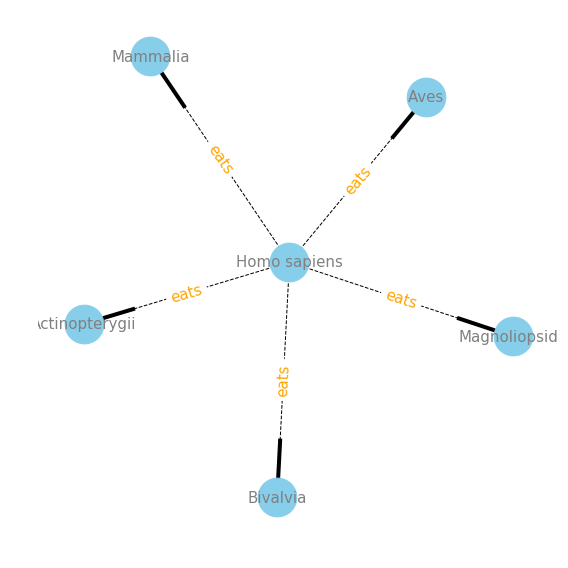

In [42]:
#interaction plot of top5 target classes that Homo sapiens eats:
plot_interaction('Homo sapiens', 'eats', 'targetTaxonClassName', 5)

We can see that Mammalia, Magnoliopsida, Actinopterygii, Aves and Bivalvia are top 5 target class that Homo sapiens eats. For me, it is surprising to see Magnoliopsida, which is a valid botanical name for a class of flowering plants.

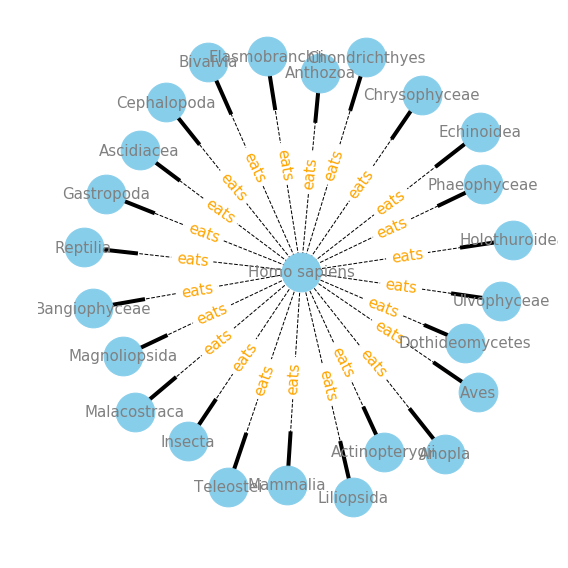

In [43]:
#without indicating n, interaction plot of all target classes that Homo sapiens eats:
plot_interaction('Homo sapiens', 'eats', 'targetTaxonClassName')

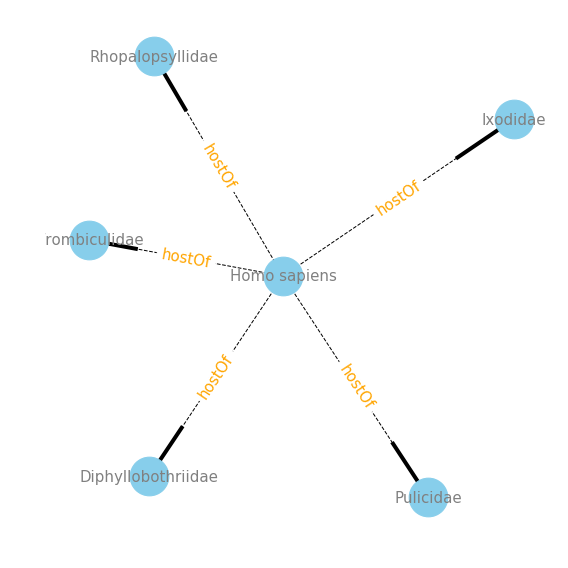

In [44]:
#interaction plot of top5 families that Homo sapiens are host of :
plot_interaction('Homo sapiens', 'hostOf', 'targetTaxonFamilyName', 5)

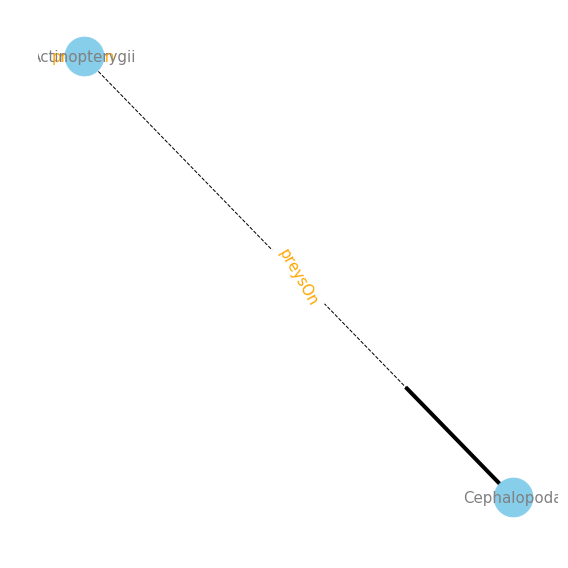

In [45]:
#interaction plot of top5 classes that Actinopterygii preys on :
plot_interaction('Actinopterygii', 'preysOn', 'targetTaxonClassName', 5)

Here it is interesting to see that Actinopterygii only preys on two classes, one of which is itself. Then it is possible that some species under class Actinopterygii preys on species under the same class.

#### Plot more than one interaction type:

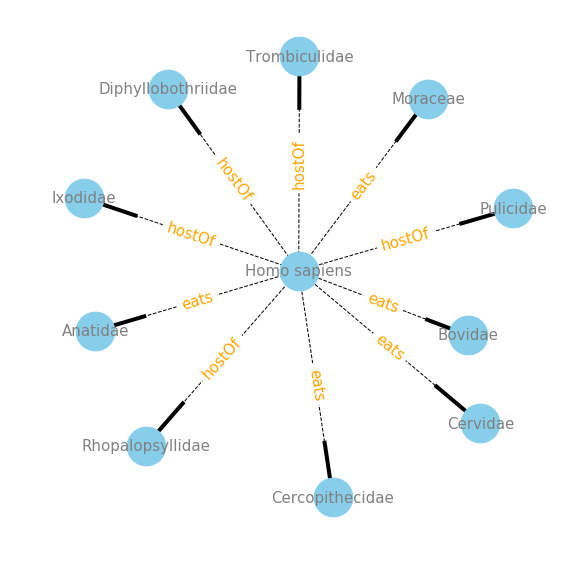

In [46]:
#interaction plot of top5 families that Homo sapiens eats and top5 families that Homo sapiens are host of :
plot_interaction('Homo sapiens', ['eats', 'hostOf'], 'targetTaxonFamilyName', 5)

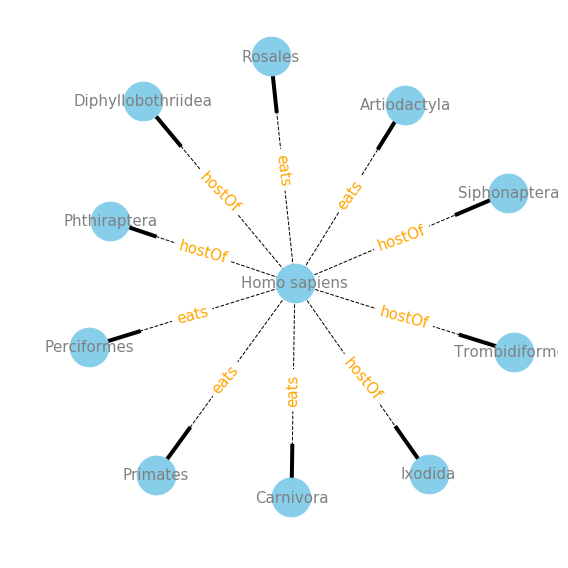

In [47]:
#interaction plot of top5 orders that Homo sapiens eats and top5 orders that Homo sapiens are host of :
plot_interaction('Homo sapiens', ['eats', 'hostOf'], 'targetTaxonOrderName', 5)

### Conclusion:

I like GloBi since it only provides data of species interactions, which makes it different from other databases. 
It makes connections between different species rather than focusing on one species at a time, which allows us to explore interesting characteristics and patterns in the networks built by interactions.    
If I have time in the future, I would like to explore the map of interactions between species by connecting GloBi to other databases which contains information of locations. I expect interesting patterns to be found on the map. How does location affect interactions between species? This remains as a question worth of looking into.  
Through the overall data exploration, I learned how to make something into clickable urls. I also gained experience on drawing directed graph using "networkx" with python.  
In the past, I have very few background knowledge in ecology. While after exploring Globi, I have known a lot more about interactions of human beings. I know what taxons humans eat and what taxons humans are host of, all of which are new to me.    
What is more, I also learnt about the API, cloud, queries and version cortrol behind the database. During the discussion with Jorrit, we talked about where the limitations come from, how to keep track of different versions and how to effectively connect data sources(museums), database and users.  
Overall, it has been an enjoyable research, through which I have obtained a lot of new knowledge on database and ecology. It is also helpful to practice and enhance my programming skills.